# Pattern Recognition 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

print(tf.__version__)

2.9.2


## Data preprocessing

In [3]:
train_dir = 'Gambo/Train'
validation_dir = 'Gambo/Test'
try_img = PIL.Image.open(train_dir+'/Normal/A-0.png')
try_img

In [4]:
print("Mode of the data: ", try_img.mode) 
print("Size of Images: ", try_img._size)

Mode of the data:  L
Size of Images:  (28, 28)


In [5]:
import glob

print("Normal: ", len(glob.glob(train_dir+'/Normal/*')))
print("Reversal: ", len(glob.glob(train_dir+'/Reversal/*')))

Normal:  39334
Reversal:  46781


In [7]:
!rm -r /Users/Aabha/Documents/My-Doc/Aabha/Gambo/Train/Corrected

In [8]:
IMAGE_SIZE = try_img._size
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                    rotation_range=10,
                                    # zoom_range = 0.1,
                                    # width_shift_range=0.1,
                                    # height_shift_range=0.1
                                  )

train_generator = train_datagen.flow_from_directory(
    train_dir,   
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE, 
    class_mode ='binary')  

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='binary')

Found 86115 images belonging to 2 classes.
Found 37439 images belonging to 2 classes.


## Model Architecture

In [17]:
INPUT_SHAPE = IMAGE_SIZE + (3, )
print(INPUT_SHAPE)

model = tf.keras.models.Sequential([                               
    tf.keras.layers.Conv2D(1, (3, 3), activation='relu', input_shape=INPUT_SHAPE, padding="same"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

(28, 28, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         28        
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 6280      
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6,317
Trainable params: 6,317
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam', 
    metrics=['accuracy'])

In [13]:
STEPS_PER_EPOCH = 86115//BATCH_SIZE
VALIDATION_STEPS = 37439//BATCH_SIZE

In [14]:
history = model.fit(train_generator, 
            epochs=5,
            steps_per_epoch = STEPS_PER_EPOCH,
            validation_data = validation_generator,
            validation_steps = VALIDATION_STEPS, 
            verbose=1)

Epoch 1/5


2022-06-25 02:55:28.240977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-06-25 02:55:28.542339: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2689/2691 [============================>.] - ETA: 0s - loss: 0.4356 - accuracy: 0.7959

2022-06-25 02:56:01.105271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2691/2691 [==============================] - 41s 15ms/step - loss: 0.4356 - accuracy: 0.7960 - val_loss: 0.4483 - val_accuracy: 0.7960
Epoch 2/5
2691/2691 [==============================] - 39s 15ms/step - loss: 0.3729 - accuracy: 0.8338 - val_loss: 0.4390 - val_accuracy: 0.8065
Epoch 3/5
2691/2691 [==============================] - 39s 14ms/step - loss: 0.3598 - accuracy: 0.8409 - val_loss: 0.4409 - val_accuracy: 0.8058
Epoch 4/5
2691/2691 [==============================] - 39s 14ms/step - loss: 0.3515 - accuracy: 0.8461 - val_loss: 0.4366 - val_accuracy: 0.8077
Epoch 5/5
2691/2691 [==============================] - 39s 15ms/step - loss: 0.3471 - accuracy: 0.8493 - val_loss: 0.4322 - val_accuracy: 0.8116


# Testing with custom input

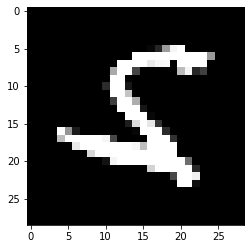

In [47]:
try_img = PIL.Image.open(validation_dir+'/Normal/A-41.png')
try_img

import cv2
img = cv2.imread(validation_dir+'/Reversal/1_3.png')
import matplotlib.pyplot as plt

plt.imshow(img)

In [48]:
img = cv2.resize(img,(28,28))
img.shape

(28, 28, 3)

In [49]:
import numpy as np

img = np.reshape(img,[1,28,28,3])

In [50]:
model.predict(img)

1/1 [==============================] - 0s 9ms/step


array([[0.00971901]], dtype=float32)